<a href="https://colab.research.google.com/github/letianwang92/DLforSLM/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is to show using sklearn and tensorflow to do logistic regression on the speed, power and pyrometer data to predict the pore fomration

developed by Letian Wang

Mount Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


This is to test if Google Drive is mounted properly.

In [6]:
with open('/content/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/My\ Drive/foo.txt

Hello Google Drive!

Import the dependencies and root folder setting

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
root_folder = '/content/gdrive/My Drive/CS282 Code and Data/'
dirTxtPath=(root_folder+"Code/dev/data/pyrometer_data_Plate1.txt")
print(dirTxtPath)

import os
        
plate, track, speed, power, x, y, pyro, isPore = np.loadtxt(dirTxtPath, delimiter=", ", usecols=(0, 1, 2, 3, 4, 5,6,7), unpack=True) #, Apore
x1=pyro
x2=speed
x3=power
y_import=isPore




/content/gdrive/My Drive/CS282 Code and Data/Code/dev/data/pyrometer_data_Plate1.txt


In [38]:
y_orig=np.reshape(np.asarray(y_import),(-1,1))
x_1=np.reshape(np.asarray(x1),(-1,1))
x_2=np.reshape(np.asarray(x2),(-1,1))
x_3=np.reshape(np.asarray(x3),(-1,1))

x_orig1=np.concatenate((x_1,x_2),axis=1)
x_orig2=np.concatenate((x_1,x_3),axis=1)
x_orig3=np.concatenate((x_2,x_3),axis=1)
x_orig_total=np.concatenate((x_1,x_orig3),axis=1)
print (x_1.shape)
print (x_orig1.shape)
print (x_orig_total.shape)
print (y_orig.shape)





(2049339, 1)
(2049339, 2)
(2049339, 3)
(2049339, 1)
(614802, 4)


In [78]:
# Seperate for test set
from sklearn.model_selection import train_test_split
import numpy


#data=np.concatenate((x_orig_total,y_orig),axis=1)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_orig_total, y_orig, test_size=0.25, random_state=0)      #test_size=0.5(whole_data)

print(x_test1.shape)

(512335, 3)


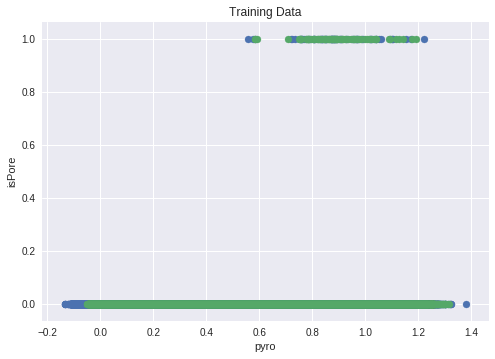

In [0]:
x1=pyro
y=isPore
n = len(x1) # Number of data points
x_avg = []

for i in range(1,len(x1)-1):
  x_avg.append((x1[i-1]+x1[i]+x1[i+1])/3)
  
plt.scatter(x1, y)
plt.scatter(x_avg, y[1:len(y)-1])
plt.xlabel('pyro')
plt.ylabel('isPore')
plt.title("Training Data") 
plt.show() 

Organize the data for logistic regression

In [0]:
def plot_feature(x_orig,y_orig):
  # Positive Data Points 
  x_pos = np.array([x_orig[i] for i in range(len(x_orig)) 
                                      if y_orig[i] == 1]) 

  # Negative Data Points 
  x_neg = np.array([x_orig[i] for i in range(len(x_orig))  
                                      if y_orig[i] == 0]) 

  # Plotting the Positive Data Points 
  plt.scatter(x_pos[:, 0], x_pos[:, 1], 
    color = 'blue', label = 'Positive') 

  # Plotting the Negative Data Points 
  plt.scatter(x_neg[:, 0], x_neg[:, 1], 
     color = 'red', label = 'Negative') 

  # Plotting the Decision Boundary 
  #plt.plot(decision_boundary_x, decision_boundary_y) 
  plt.xlabel('Feature 1') 
  plt.ylabel('Feature 2') 
  plt.title('Plot of Decision Boundary') 
  plt.legend() 

  plt.show() 
  
  return

def plot_feature_pos(x_orig,y_orig,xlab,ylab):
  # Positive Data Points 
  x_pos = np.array([x_orig[i] for i in range(len(x_orig)) 
                                      if y_orig[i] == 1]) 

  # Plotting the Positive Data Points 
  plt.scatter(x_pos[:, 0], x_pos[:, 1], 
    color = 'blue', label = 'Positive') 


  # Plotting the Decision Boundary 
  #plt.plot(decision_boundary_x, decision_boundary_y) 
  plt.xlabel(xlab) 
  plt.ylabel(ylab) 
  plt.title('Plot of Decision Boundary') 
  plt.legend() 

  plt.show() 
  
  return


def plot_feature_neg(x_orig,y_orig,xlab,ylab):
  # Positive Data Points 
  # Negative Data Points 
  x_neg = np.array([x_orig[i] for i in range(len(x_orig))  
                                      if y_orig[i] == 0]) 


  # Plotting the Negative Data Points 
  plt.scatter(x_neg[:, 0], x_neg[:, 1], 
     color = 'red', label = 'Negative') 


  # Plotting the Decision Boundary 
  #plt.plot(decision_boundary_x, decision_boundary_y) 
  plt.xlabel(xlab) 
  plt.ylabel(ylab) 
  plt.title('Plot of Decision Boundary') 
  plt.legend() 

  plt.show() 
  
  return



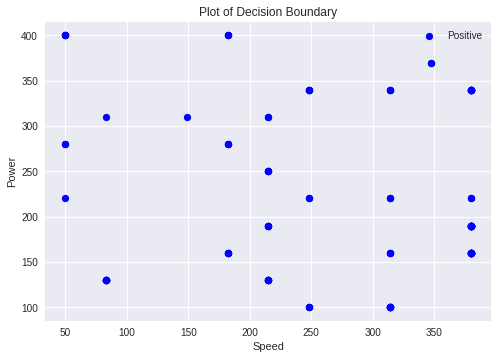

In [25]:
plot_feature_pos(x_orig3,y_orig,'Speed','Power')

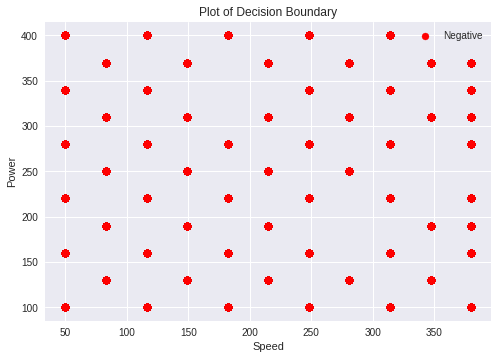

In [26]:
plot_feature_neg(x_orig3,y_orig,'Speed','Power')

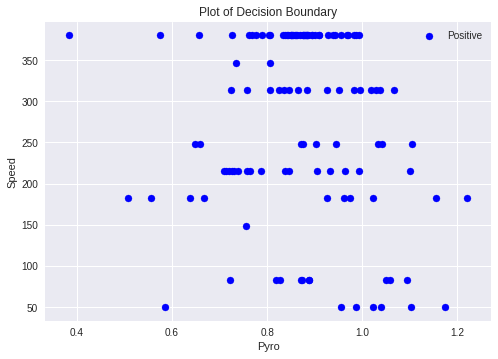

In [0]:
plot_feature_pos(x_orig1,y_orig,'Pyro','Speed')

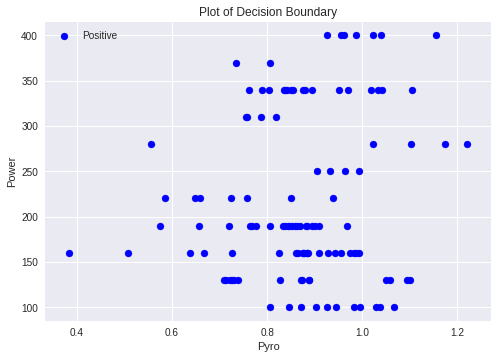

In [0]:
plot_feature_pos(x_orig2,y_orig,'Pyro','Power')

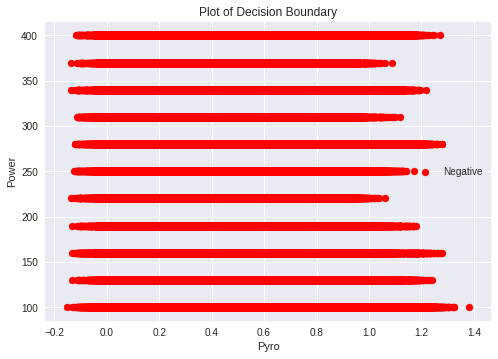

In [27]:
plot_feature_neg(x_orig2,y_orig,'Pyro','Power')


In [11]:
print("Shape of Feature Matrix:", x_orig1.shape) 
print("Shape Label Vector:", y_orig.shape) 

Shape of Feature Matrix: (2049339, 2)
Shape Label Vector: (2049339, 1)


Sk-learn

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

logisticRegr.fit(x_train1, y_train1)

y_pred1=logisticRegr.predict(x_test1)




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:
score = logisticRegr.score(x_test1, y_test1)
print(score)

confusion_matrix(y_test1, y_pred1)


0.9999394927147277


array([[512304,      0],
       [    31,      0]])

In [0]:

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Plot the confusion matrix

Confusion matrix, without normalization
[[512304      0]
 [    31      0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


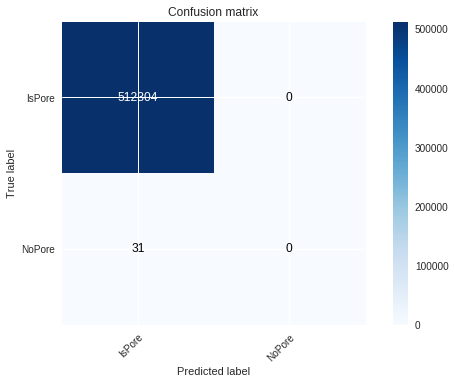

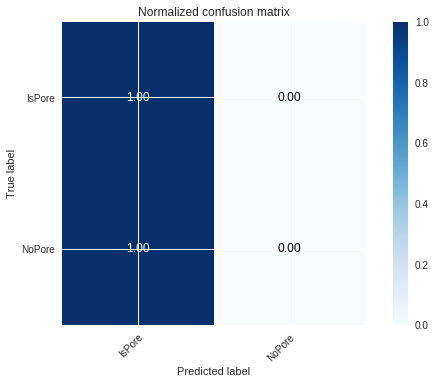

In [95]:
#class_names = np.ndarray(['hello','snake','plate'], dtype=str)
class_names2=['IsPore','NoPore']
confusion_matrix(y_test1, y_pred1)
# Plot non-normalized confusion matrix

# Plot normalized confusion matrix
plot_confusion_matrix(y_test1, y_pred1, classes=class_names2, normalize=False,
                      title='Confusion matrix')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test1, y_pred1, classes=class_names2, normalize=True,
                      title='Normalized confusion matrix')

OneHot Encoder- 

In [17]:

from sklearn.preprocessing import OneHotEncoder 
# Creating the One Hot Encoder 
oneHot = OneHotEncoder() 
x_orig=x_orig3
# Encoding x_orig 
oneHot.fit(x_orig) 
x = oneHot.transform(x_orig).toarray() 
  
# Encoding y_orig 
oneHot.fit(y_orig) 
y = oneHot.transform(y_orig).toarray() 
  
m, n = x.shape 
print('m =', m) 
print('n =', n) 

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

m = 2049339
n = 22


Logistic regression for 2 vairables- OneHot

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

m = 2049339
n = 22
Epoch 1 Cost: 2083566.375
Epoch 2 Cost: 2083566.375
Epoch 3 Cost: 2083566.375
Epoch 4 Cost: 2083566.375
Epoch 5 Cost: 2083566.375
Epoch 6 Cost: 2083566.375
Epoch 7 Cost: 2083566.375
Epoch 8 Cost: 2083566.375
Epoch 9 Cost: 2083566.375

Accuracy: 99.99439120292664 %


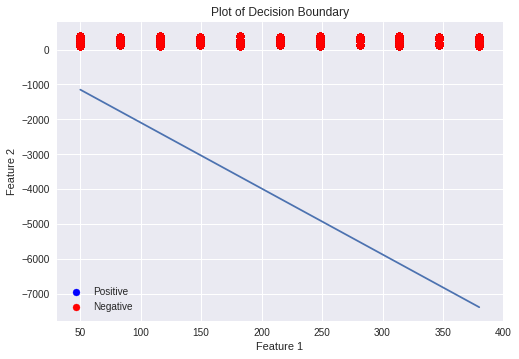

In [22]:
from sklearn.preprocessing import OneHotEncoder 
# Creating the One Hot Encoder 
oneHot = OneHotEncoder() 
x_orig=x_orig3
# Encoding x_orig 
oneHot.fit(x_orig) 
x = oneHot.transform(x_orig).toarray() 
  
# Encoding y_orig 
oneHot.fit(y_orig) 
y = oneHot.transform(y_orig).toarray() 
  
m, n = x.shape 
print('m =', m) 
print('n =', n) 

alpha, epochs = 0.0035, 10


X = tf.placeholder(tf.float32, [None, n]) 
  
# Since this is a binary classification problem, 
# Y can take only 2 values. 
Y = tf.placeholder(tf.float32, [None, 2]) 
  
# Trainable Variable Weights 
W = tf.Variable(tf.zeros([n, 2])) 
  
# Trainable Variable Bias 
b = tf.Variable(tf.zeros([2])) 

# Hypothesis 

Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b)) 
  
# Sigmoid Cross Entropy Cost Function 
cost = tf.nn.sigmoid_cross_entropy_with_logits( 
                    logits = Y_hat, labels = Y) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer( 
         learning_rate = alpha).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 



# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Lists for storing the changing Cost and Accuracy in every Epoch 
    cost_history, accuracy_history = [], [] 
      
    # Iterating through all the epochs 
    for epoch in range(epochs): 
        cost_per_epoch = 0
          
        # Running the Optimizer 
        sess.run(optimizer, feed_dict = {X : x, Y : y}) 
          
        # Calculating cost on current Epoch 
        c = sess.run(cost, feed_dict = {X : x, Y : y}) 
          
        # Calculating accuracy on current Epoch 
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
                                          tf.argmax(Y, 1)) 
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, 
                                                 tf.float32)) 
          
        # Storing Cost and Accuracy to the history 
        cost_history.append(sum(sum(c))) 
        accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100) 
          
        # Displaying result on current Epoch 
        if epoch % 1 == 0 and epoch != 0: 
            print("Epoch " + str(epoch) + " Cost: "
                            + str(cost_history[-1])) 
      
    Weight = sess.run(W) # Optimized Weight 
    Bias = sess.run(b)   # Optimized Bias 
      
    # Final Accuracy 
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
                                      tf.argmax(Y, 1)) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,  
                                             tf.float32)) 
    print("\nAccuracy:", accuracy_history[-1], "%") 

    
    
# Calculating the Decision Boundary 
decision_boundary_x = np.array([np.min(x_orig[:, 0]), 
                               np.max(x_orig[:, 0])]) 
  
decision_boundary_y = (- 1.0 / Weight[0]) * (decision_boundary_x * Weight + Bias) 
  
decision_boundary_y = [sum(decision_boundary_y[:, 0]),  
                       sum(decision_boundary_y[:, 1])] 
  
# Positive Data Points 
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) 
                                    if y_orig[i] == 1]) 
  
# Negative Data Points 
x_neg = np.array([x_orig[i] for i in range(len(x_orig))  
                                    if y_orig[i] == 0]) 
  
# Plotting the Positive Data Points 
plt.scatter(x_pos[:, 0], x_pos[:, 1], 
  color = 'blue', label = 'Positive') 
  
# Plotting the Negative Data Points 
plt.scatter(x_neg[:, 0], x_neg[:, 1], 
   color = 'red', label = 'Negative') 
  
# Plotting the Decision Boundary 
plt.plot(decision_boundary_x, decision_boundary_y) 
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Plot of Decision Boundary') 
plt.legend() 
  
plt.show()

2 variables -non hot

Learning Rate = 0.0035
Number of Epochs = 10
m = 2049339
n = 3
Epoch 1 Cost: 1442985.0
Epoch 2 Cost: 1442985.0
Epoch 3 Cost: 1442985.0
Epoch 4 Cost: 1442985.0
Epoch 5 Cost: 1442985.0
Epoch 6 Cost: 1442985.0
Epoch 7 Cost: 1442985.0
Epoch 8 Cost: 1442985.0
Epoch 9 Cost: 1442985.0

Accuracy: 100.0 %


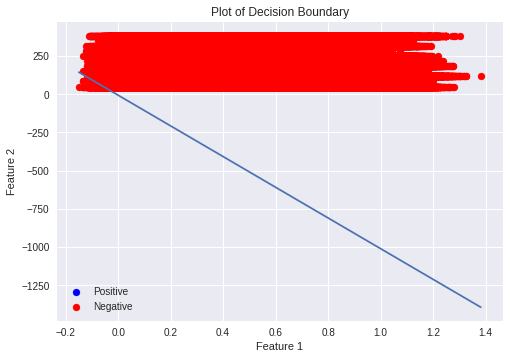

In [49]:

print('Learning Rate =', alpha) 
print('Number of Epochs =', epochs) 
x=x_orig_total
y=y_orig
m, n = x.shape 
print('m =', m) 
print('n =', n) 

nY=1

X = tf.placeholder(tf.float32, [None, n]) 
  
# Since this is a binary classification problem, 
# Y can take only 2 values. 
Y = tf.placeholder(tf.float32, [None, nY]) 
  
# Trainable Variable Weights 
W = tf.Variable(tf.zeros([n, nY])) 
  
# Trainable Variable Bias 
b = tf.Variable(tf.zeros([nY])) 

# Hypothesis 

Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b)) 
  
# Sigmoid Cross Entropy Cost Function 
cost = tf.nn.sigmoid_cross_entropy_with_logits( 
                    logits = Y_hat, labels = Y) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer( 
         learning_rate = alpha).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 



# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Lists for storing the changing Cost and Accuracy in every Epoch 
    cost_history, accuracy_history = [], [] 
      
    # Iterating through all the epochs 
    for epoch in range(epochs): 
        cost_per_epoch = 0
          
        # Running the Optimizer 
        sess.run(optimizer, feed_dict = {X : x, Y : y}) 
          
        # Calculating cost on current Epoch 
        c = sess.run(cost, feed_dict = {X : x, Y : y}) 
          
        # Calculating accuracy on current Epoch 
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
                                          tf.argmax(Y, 1)) 
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, 
                                                 tf.float32)) 
          
        # Storing Cost and Accuracy to the history 
        cost_history.append(sum(sum(c))) 
        accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100) 
          
        # Displaying result on current Epoch 
        if epoch % 1 == 0 and epoch != 0: 
            print("Epoch " + str(epoch) + " Cost: "
                            + str(cost_history[-1])) 
      
    Weight = sess.run(W) # Optimized Weight 
    Bias = sess.run(b)   # Optimized Bias 
      
    # Final Accuracy 
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
                                      tf.argmax(Y, 1)) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,  
                                             tf.float32)) 
    print("\nAccuracy:", accuracy_history[-1], "%") 

    
    
# Calculating the Decision Boundary 
decision_boundary_x = np.array([np.min(x_orig[:, 0]), 
                               np.max(x_orig[:, 0])]) 
  
decision_boundary_y = (- 1.0 / Weight[0]) * (decision_boundary_x * Weight + Bias) 
  
decision_boundary_y = [sum(decision_boundary_y[:, 0]),  
                       sum(decision_boundary_y[:, 1])] 
  
# Positive Data Points 
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) 
                                    if y_orig[i] == 1]) 
  
# Negative Data Points 
x_neg = np.array([x_orig[i] for i in range(len(x_orig))  
                                    if y_orig[i] == 0]) 
  
# Plotting the Positive Data Points 
plt.scatter(x_pos[:, 0], x_pos[:, 1], 
  color = 'blue', label = 'Positive') 
  
# Plotting the Negative Data Points 
plt.scatter(x_neg[:, 0], x_neg[:, 1], 
   color = 'red', label = 'Negative') 
  
# Plotting the Decision Boundary 
plt.plot(decision_boundary_x, decision_boundary_y) 
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Plot of Decision Boundary') 
plt.legend() 
  
plt.show()

Logistic regression for 3 vairables- OneHot

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

m = 2049339
n = 24
Epoch 1 Cost: 2083566.375
Epoch 2 Cost: 2083566.375
Epoch 3 Cost: 2083566.375
Epoch 4 Cost: 2083566.375
Epoch 5 Cost: 2083566.375
Epoch 6 Cost: 2083566.375
Epoch 7 Cost: 2083566.375
Epoch 8 Cost: 2083566.375
Epoch 9 Cost: 2083566.375

Accuracy: 99.99439120292664 %


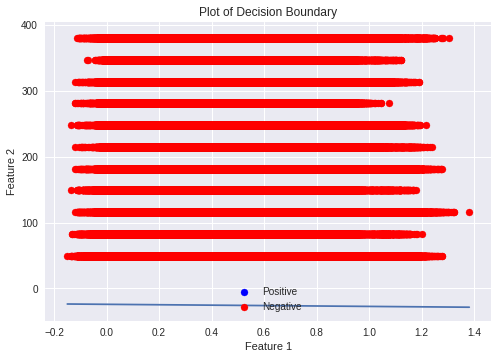

In [50]:
x_orig=x_orig_total


from sklearn.preprocessing import OneHotEncoder 
# Creating the One Hot Encoder 
oneHot = OneHotEncoder() 

# Encoding x_orig 
oneHot.fit(x_orig) 
x = oneHot.transform(x_orig).toarray() 
  
# Encoding y_orig 
oneHot.fit(y_orig) 
y = oneHot.transform(y_orig).toarray() 
  
m, n = x.shape 
print('m =', m) 
print('n =', n) 

alpha, epochs = 0.0035, 10


X = tf.placeholder(tf.float32, [None, n]) 
  
# Since this is a binary classification problem, 
# Y can take only 2 values. 
Y = tf.placeholder(tf.float32, [None, 2]) 
  
# Trainable Variable Weights 
W = tf.Variable(tf.zeros([n, 2])) 
  
# Trainable Variable Bias 
b = tf.Variable(tf.zeros([2])) 

# Hypothesis 

Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b)) 
  
# Sigmoid Cross Entropy Cost Function 
cost = tf.nn.sigmoid_cross_entropy_with_logits( 
                    logits = Y_hat, labels = Y) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer( 
         learning_rate = alpha).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 



# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Lists for storing the changing Cost and Accuracy in every Epoch 
    cost_history, accuracy_history = [], [] 
      
    # Iterating through all the epochs 
    for epoch in range(epochs): 
        cost_per_epoch = 0
          
        # Running the Optimizer 
        sess.run(optimizer, feed_dict = {X : x, Y : y}) 
          
        # Calculating cost on current Epoch 
        c = sess.run(cost, feed_dict = {X : x, Y : y}) 
          
        # Calculating accuracy on current Epoch 
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
                                          tf.argmax(Y, 1)) 
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, 
                                                 tf.float32)) 
          
        # Storing Cost and Accuracy to the history 
        cost_history.append(sum(sum(c))) 
        accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100) 
          
        # Displaying result on current Epoch 
        if epoch % 1 == 0 and epoch != 0: 
            print("Epoch " + str(epoch) + " Cost: "
                            + str(cost_history[-1])) 
      
    Weight = sess.run(W) # Optimized Weight 
    Bias = sess.run(b)   # Optimized Bias 
      
    # Final Accuracy 
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
                                      tf.argmax(Y, 1)) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,  
                                             tf.float32)) 
    print("\nAccuracy:", accuracy_history[-1], "%") 

    
    
# Calculating the Decision Boundary 
decision_boundary_x = np.array([np.min(x_orig[:, 0]), 
                               np.max(x_orig[:, 0])]) 
  
decision_boundary_y = (- 1.0 / Weight[0]) * (decision_boundary_x * Weight + Bias) 
  
decision_boundary_y = [sum(decision_boundary_y[:, 0]),  
                       sum(decision_boundary_y[:, 1])] 
  
# Positive Data Points 
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) 
                                    if y_orig[i] == 1]) 
  
# Negative Data Points 
x_neg = np.array([x_orig[i] for i in range(len(x_orig))  
                                    if y_orig[i] == 0]) 
  
# Plotting the Positive Data Points 
plt.scatter(x_pos[:, 0], x_pos[:, 1], 
  color = 'blue', label = 'Positive') 
  
# Plotting the Negative Data Points 
plt.scatter(x_neg[:, 0], x_neg[:, 1], 
   color = 'red', label = 'Negative') 
  
# Plotting the Decision Boundary 
plt.plot(decision_boundary_x, decision_boundary_y) 
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Plot of Decision Boundary') 
plt.legend() 
  
plt.show()

Logistic Regression using Sk-learn